<a href="https://colab.research.google.com/github/OliverGong77/NYU_Integrated_Marketing/blob/main/Predicting_Customer_Spending_score_final_%E7%BB%88%E4%BA%8E%E6%90%9E%E5%AE%9A%E4%BA%86%E5%98%BF%E5%98%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install pingouin

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/OliverGong77/NYU_Integrated_Marketing/main/XYZSupermarket_CustomerMembers.csv')
df=df.dropna()
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Correlation


In [ ]:
# install the software
import pingouin as pg

### The pairwise correlation 
https://pingouin-stats.org/generated/pingouin.pairwise_corr.html#pingouin.pairwise_corr

In [ ]:
pg.pairwise_corr(df,columns=['Annual Income (k$)', 'Age'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Annual Income (k$),Age,pearson,two-sided,200,-0.012,"[-0.15, 0.13]",0.0,-0.01,-0.012,0.862,0.09,0.053


In [ ]:
pg.pairwise_corr(df,columns=['Annual Income (k$)', 'Age','Spending Score (1-100)'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Annual Income (k$),Age,pearson,two-sided,200,-0.012,"[-0.15, 0.13]",0.000,-0.010,-0.012,0.862,0.09,0.053
1,Annual Income (k$),Spending Score (1-100),pearson,two-sided,200,0.010,"[-0.13, 0.15]",0.000,-0.010,0.010,0.889,0.089,0.052
2,Age,Spending Score (1-100),pearson,two-sided,200,-0.327,"[-0.45, -0.2]",0.107,0.098,-0.340,0.000,5865.253,0.998


### The Partial correlation
https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr

In [ ]:
# Partial correlation of total_day_calls and number_customer_service_calls controlling for account_length
x='Annual Income (k$)'
y='Age'
control='Spending Score (1-100)'
pg.partial_corr(data=df, x=x, y=y, covar=control,
                method='pearson').round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,200,-0.01,"[-0.15, 0.13]",0.0,-0.01,0.892,0.089,0.052


# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [ ]:
#install the package
import seaborn as sns

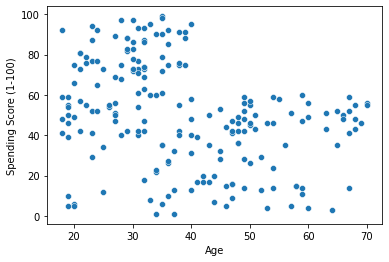

In [ ]:
x='Age'
y='Spending Score (1-100)'
sns.scatterplot(data=df, x=x, y=y)

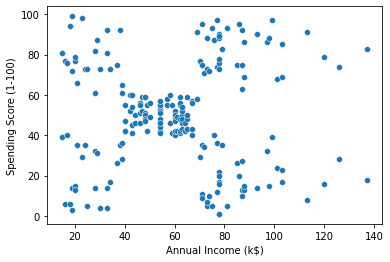

In [ ]:
x='Annual Income (k$)'
y='Spending Score (1-100)'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [ ]:
import statsmodels.api as sm

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [ ]:
# define the dependent and independent variables
X=df[['Age','Annual Income (k$)']]
y=df['Spending Score (1-100)']


In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,Age,Annual Income (k$)
0,1.0,19,15
1,1.0,21,15
2,1.0,20,16
3,1.0,23,16
4,1.0,31,17


In [ ]:
# conduct regression
model = sm.OLS(y, X).fit()

In [ ]:
# print model summary
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Spending Score (1-100)   R-squared:                       0.107
Model:                                OLS   Adj. R-squared:                  0.098
Method:                     Least Squares   F-statistic:                     11.82
Date:                    Thu, 03 Dec 2020   Prob (F-statistic):           1.42e-05
Time:                            01:13:12   Log-Likelihood:                -922.21
No. Observations:                     200   AIC:                             1850.
Df Residuals:                         197   BIC:                             1860.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

### Check assumptions

In [ ]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,-22.943123,61.943123
1,20.266452,60.733548
2,-55.344084,61.344084
3,17.470278,59.529722
4,-14.697173,54.697173


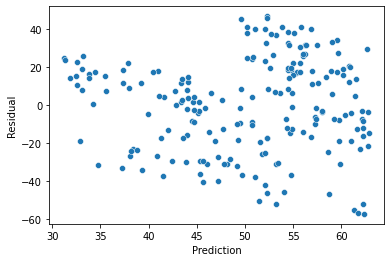

In [ ]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

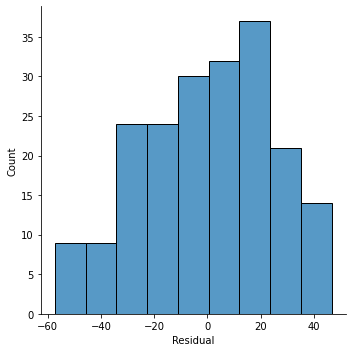

In [ ]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [ ]:
x=df_res['Residual']
pg.normality(x)

,W,pval,normal
Residual,0.980715,0.00752,False


In [ ]:
pg.pairwise_corr(df,columns=['Age','Annual Income (k$)'], method='spearman').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,Age,Annual Income (k$),spearman,two-sided,200,0.02,"[-0.12, 0.16]",0.0,-0.01,0.02,0.781,0.059


#Logit Analysis

In [ ]:
df['Churn_Numeric'] = df['churn'].apply(lambda x: 1 if x =='yes' else 0)
df.head()

KeyError: ignored

In [ ]:
y=df['Churn_Numeric']
X=df[['total_intl_minutes','number_customer_service_calls','account_length']]

In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

In [ ]:
# conduct regression
logit_model = sm.Logit(y, X).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the odds ratio
np.exp(logit_model.params)

In [ ]:
### get the predictions 
pred_prob = logit_model.predict(X)
df_result=pd.DataFrame({'Pred_prob': pred_prob,'y':y})
df_result['Prediction']=df_result['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_result.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction = df_result['Prediction']
accuracy_score(y, Prediction)

# Cross Validation

In [ ]:
## get the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# conduct regression
logit_model = sm.Logit(y_train, X_train).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the predictions on the test data
pred_prob = logit_model.predict(X_test)
df_test=pd.DataFrame({'Pred_prob': pred_prob,'y_test':y_test})
df_test['Prediction']=df_test['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_test.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction =df_test['Prediction']
accuracy_score(y_test, Prediction)

### draw confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix
confmtrx = np.array(confusion_matrix(y_test, Prediction))
pd.DataFrame(confmtrx, index=['Non-Churn','Churn'],
columns=['predicted_Non_Churn', 'predicted_Churn'])

#Calculate the F1 score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, Prediction)

# Cross validation for multiple times

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
scores = cross_val_score(log_reg, X, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

# Appendix

In [ ]:
Z =np.linspace(-100,100,10000)
P=np.exp(Z)/(1+np.exp(Z))
import plotly.express as px
fig = px.scatter(x=Z, y=P)
fig.show()